<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Assignment Questions </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## <font color='green'> Group Number:  CT1 Project Group-8 </font> 

### Team Members

### <font color='blue'> 1. Kaushik Sharan Rajamani </font> 

### <font color='blue'> 2. Mohamad Faizal </font> 

###  <font color='blue'> 3. Priyadarsshini S </font> 


## Problem Statement



### About the data set (Rainfall Prediction data)

The dataset contains information about rainfall predictions. The aim is to find whether rainfall will occur or not based on the several parameters of the atmospheric conditions and profile. <br> Attribute information: 

**Date:** Dates on which rainfall occurred or not 

**Location:** Location where we want to classify rainfall occurrence.

**MinTemp:** Minimum temperature in that particular date

**MaxTemp:** Maximum temperature in that particular date

**Rainfall:** Rainfall occurrence level in cm

**Evaporation:** Evaporation value

**Sunshine:** Sunshine level in m

**WindGustDir:** Direction of wind

**WindGustSpeed:**  Wind Speed

**WindDir9am:** Wind direction at 9am

**WindDir3pm:** Wind direction at 3pm

**WindSpeed9am:** Wind speed at 9am

**WindSpeed3pm:** Wind speed at 3pm

**Humidity9am:** Humidity at 9am

**Humidity3pm:** Humidity at 3pm

**Pressure9am:** Pressure at 9am

**Pressure3pm:** Pressure at 9am

**Cloud9am:** Cloud Cover at 9am

**Cloud3pm:** Cloud Cover at 3pm

**Temp9am:** Temperature at 9am

**Temp3pm:** Temperature at 3pm

**RainToday:** Rain fall happened or not today

**RainTomorrow:** Does tomorrow rainfall will happen or not: Yes(1) or No(0)

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Remove Insignificant Variables](#drop)**
    - 2.4 - **[Distribution of Variables](#dist)**
    - 2.5 - **[Missing Value Treatment](#null)**
    - 2.6 - **[Dummy Encode the Categorical Variables](#dummy)**
    - 2.7 - **[Scale the Data](#scale)**
    - 2.8 - **[Train-Test Split](#split)**
3. **[Logistic Regression (Full Model)](#logit)**
    - 3.1 - **[Identify the Best Cut-off Value](#cut_off)**
        - 3.1.1 - **[Youden's Index](#youden)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

#### Read the dataset and print the first five observations.

In [98]:
df = pd.read_csv(r"C:\Users\priya\SRM PYTHON\MLSC\MP1\Rainfall_prediction_data.csv")
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,07-03-2012,Wollongong,16.0,20.4,8.2,NaN,NaN,S,63.0,SSW,SW,39.0,20.0,69.0,92.0,1018.5,1017.6,1.0,8.0,17.4,15.6,Yes,Yes
1,06-01-2011,PerthAirport,18.5,25.9,16.0,5.4,11.8,WSW,39.0,SSW,WSW,20.0,22.0,60.0,36.0,1004.6,1003.6,7.0,1.0,22.2,25.1,Yes,No
2,29-06-2014,Penrith,8.7,16.5,0.0,NaN,NaN,WNW,56.0,WNW,WNW,19.0,22.0,41.0,41.0,NaN,NaN,NaN,NaN,13.1,15.1,No,No
3,16-12-2008,Cairns,25.5,33.9,0.2,5.0,7.0,SSE,41.0,SSE,SE,11.0,19.0,64.0,59.0,1009.8,1007.4,6.0,5.0,30.8,31.5,No,No
4,21-04-2015,SalmonGums,3.8,23.0,0.0,NaN,NaN,N,28.0,NE,W,13.0,7.0,56.0,29.0,NaN,NaN,NaN,NaN,14.0,21.1,No,No


**Let us now see the number of variables and observations in the data.**

In [99]:
df.shape

(1040, 23)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1040 non-null   object 
 1   Location       1040 non-null   object 
 2   MinTemp        1035 non-null   float64
 3   MaxTemp        1035 non-null   float64
 4   Rainfall       1029 non-null   float64
 5   Evaporation    582 non-null    float64
 6   Sunshine       533 non-null    float64
 7   WindGustDir    969 non-null    object 
 8   WindGustSpeed  969 non-null    float64
 9   WindDir9am     981 non-null    object 
 10  WindDir3pm     1014 non-null   object 
 11  WindSpeed9am   1032 non-null   float64
 12  WindSpeed3pm   1023 non-null   float64
 13  Humidity9am    1031 non-null   float64
 14  Humidity3pm    1016 non-null   float64
 15  Pressure9am    929 non-null    float64
 16  Pressure3pm    932 non-null    float64
 17  Cloud9am       613 non-null    float64
 18  Cloud3pm

### INFERENCE:<font color='green'> The given dataset contains 23 features with over 1040 rows. From the non-null count, we can understand that there are missing values for several features. </font>

<a id="dtype"></a>
## 2.2 Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [101]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

###  INFERENCE:   <font color='green'> Out of 23 features, 7 features are of categorical datatype and 16 features are numerical in nature. </font>

#### Change the data type as per the data definition.

In [102]:
df['Date'].dtype

dtype('O')

###  INFERENCE:   <font color='green'> From the above result, we can see that feature 'Date' is in categorical datatype. Lets convert it into datetime format for further analysis.</font>

In [103]:
df['Date'].head()

0    07-03-2012
1    06-01-2011
2    29-06-2014
3    16-12-2008
4    21-04-2015
Name: Date, dtype: object

In [104]:
pd.to_datetime(df['Date']).head(5)

0   2012-07-03
1   2011-06-01
2   2014-06-29
3   2008-12-16
4   2015-04-21
Name: Date, dtype: datetime64[ns]

###  INFERENCE:   <font color='blue'> When we compare results after converting 'Date' into datetime format, we could difference in values of the data. Lets consider the first record in 'Date' feature, <font color='green'>'07-03-2012'(7th March 2012) </font>. After converting into datetime format,value has changed to <font color='green'> 2012-07-03 (3rd July 2012).</font>
    
### <font color='blue'> Similarly, the 2nd record '06-01-2011' (6th Jan 2011) is converted to 2011-06-01 (1st June 2011). But the 3rd record '29-06-2014' (29th June 2014) has been properly converted into datetime format 2014-06-29 (29th June 2014).</font>
    
### <font color='green'> In order to avoid this type of data corruption, lets extract only the month from 'Date' feature and save it in a seoarate column. Later we can convert it into datetime format and use for analysis.</font>

In [105]:
df['Month']= df['Date']

In [106]:
df['Month'].head()

0    07-03-2012
1    06-01-2011
2    29-06-2014
3    16-12-2008
4    21-04-2015
Name: Month, dtype: object

In [107]:
# To extract only the month number

df['Month']=df['Month'].str[3:5]
df['Month'].head()

0    03
1    01
2    06
3    12
4    04
Name: Month, dtype: object

In [108]:
df['Month']=pd.to_datetime(df['Month'], format='%m').dt.month_name()
df['Month'].head()

0       March
1     January
2        June
3    December
4       April
Name: Month, dtype: object

###  INFERENCE:   <font color='green'> Since we have used only the month part from 'Date' feature to convert into month name, our data is now more reliable.</font>

In [109]:
# Before conversion to numerical datatype
df['RainTomorrow'].value_counts()

No     829
Yes    211
Name: RainTomorrow, dtype: int64

In [110]:
for i in ['RainTomorrow']:
    df[i].replace({'Yes': 1,'No': 0},inplace=True)

In [111]:
# After conversion to numerical datatype
df['RainTomorrow'].value_counts()

0    829
1    211
Name: RainTomorrow, dtype: int64

###  INFERENCE:   <font color='green'> Feature - 'RainTomorrow'is converted to numerical datatype by replacing values 'Yes' with  value 1 and 'No' with value 0.</font>

#### Recheck the data type after the conversion. 

In [112]:
df['Date']=pd.to_datetime(df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

In [113]:
df['Month'].dtype

dtype('O')

In [114]:
df['RainTomorrow'].dtype

dtype('int64')

###  INFERENCE:   <font color='green'> Feature 'Date' is in datetime format and feature 'Month' is in object datatype as it stores name of the month. We will be using 'Month' feature further in our analysis. And also target variable ''RainTomorrow' is in numerical datatype.</font>

<a id="drop"></a>
## 2.3 Remove Insignificant Variables, if its applicable.

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1040 non-null   datetime64[ns]
 1   Location       1040 non-null   object        
 2   MinTemp        1035 non-null   float64       
 3   MaxTemp        1035 non-null   float64       
 4   Rainfall       1029 non-null   float64       
 5   Evaporation    582 non-null    float64       
 6   Sunshine       533 non-null    float64       
 7   WindGustDir    969 non-null    object        
 8   WindGustSpeed  969 non-null    float64       
 9   WindDir9am     981 non-null    object        
 10  WindDir3pm     1014 non-null   object        
 11  WindSpeed9am   1032 non-null   float64       
 12  WindSpeed3pm   1023 non-null   float64       
 13  Humidity9am    1031 non-null   float64       
 14  Humidity3pm    1016 non-null   float64       
 15  Pressure9am    929 no

<AxesSubplot:>

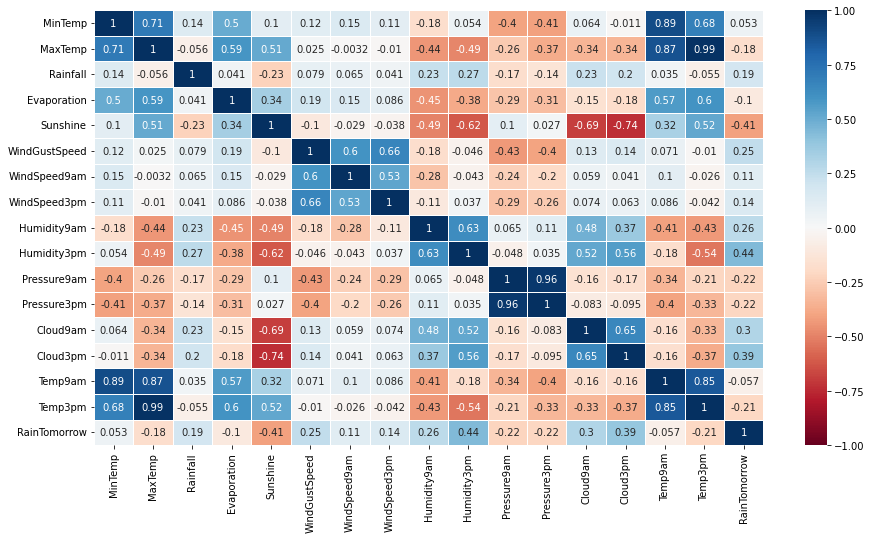

In [116]:
fig, ax = plt.subplots(figsize=(15,8)) 
sns.heatmap(df.corr(),annot = True,linewidths=.5,cmap='RdBu',vmin=-1,vmax=1)

In [117]:
df.drop(columns=[ 'Date','Location','WindSpeed9am','WindSpeed3pm','WindGustDir'],axis=1,inplace=True)

###  INFERENCE:   

### <font color='green'> Feature 'Date' can be dropped since we have extracted month and kept it in a separate column 'Month'.</font>

### <font color='green'> Feature 'WindSpeed9am' and 'WindSpeed3pm' is dropped as they have high correlation between them. Instead of these 2 features, we can use 'WindGustSpeed' for our model .</font>

### <font color='green'> Feature 'WindGustDir' is dropped as we have two similar other features to determine direction of wind - 'WindSpeed9am' and 'WindSpeed3pm'.</font>

<a id="dist"></a>
## 2.4 Distribution of Variables

**Distribution of numeric independent variables.**

In [118]:
num_indep = df.select_dtypes(include=np.number).columns.tolist()
print(num_indep)
print("Number of numeric var:" ,len(num_indep))

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']
Number of numeric var: 15


In [119]:
# To remove RainTomorrow which is the target/dependent variable

num_indep.pop() 
print(num_indep)
print("Number of numeric var:" ,len(num_indep))

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Number of numeric var: 14


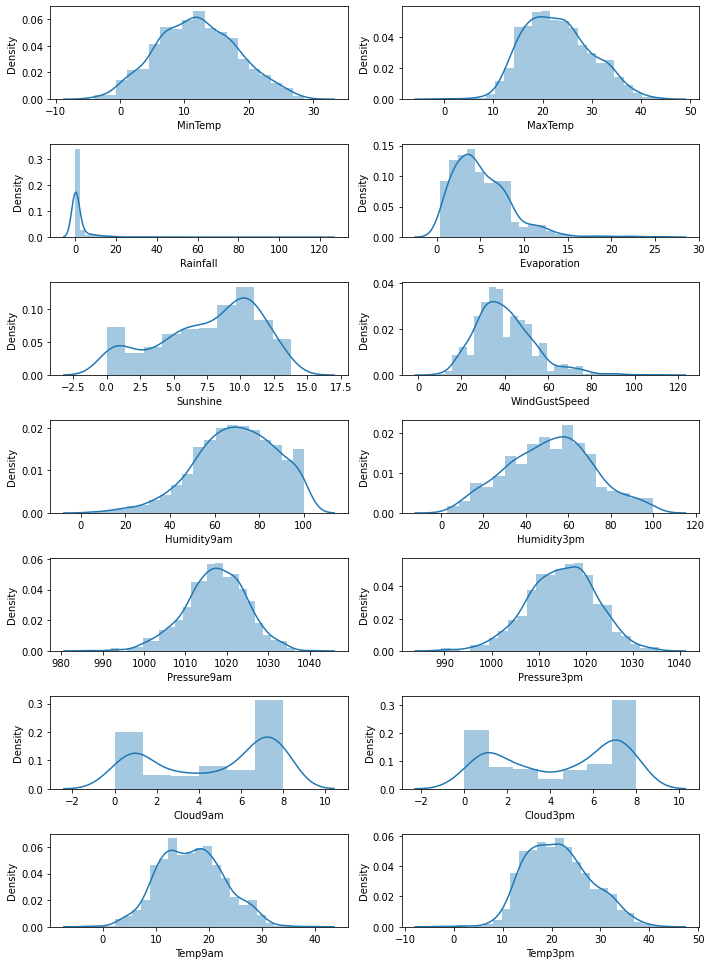

In [120]:
plt.figure(figsize= (10,15))
for i in range(0,len(num_indep)):
    plt.subplot(8,2,int(i+1))
    sns.distplot(df[num_indep[i]]) 

plt.tight_layout()
plt.show()

**Distribution of categoric independent variable.**

In [121]:
catg_indep = df.select_dtypes(include=object).columns.tolist()
catg_indep

['WindDir9am', 'WindDir3pm', 'RainToday', 'Month']

In [122]:
df_cat=df[catg_indep]
df_cat.head()

,WindDir9am,WindDir3pm,RainToday,Month
0,SSW,SW,Yes,March
1,SSW,WSW,Yes,January
2,WNW,WNW,No,June
3,SSE,SE,No,December
4,NE,W,No,April


In [123]:
# Lets drop null values to plot histplot using categorical independent variables 

df_cat.dropna(inplace=True)
df_cat.isnull().sum()

WindDir9am    0
WindDir3pm    0
RainToday     0
Month         0
dtype: int64

In [124]:
# pip install --user seaborn --upgrade

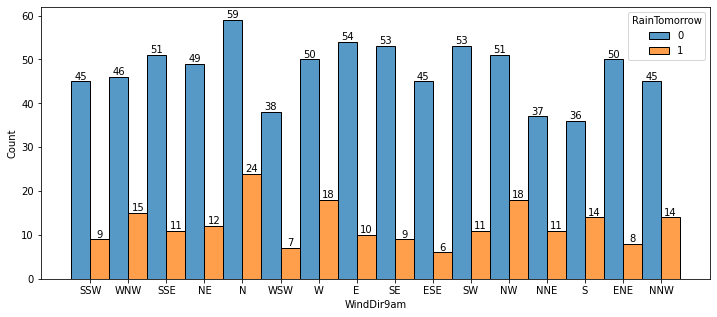

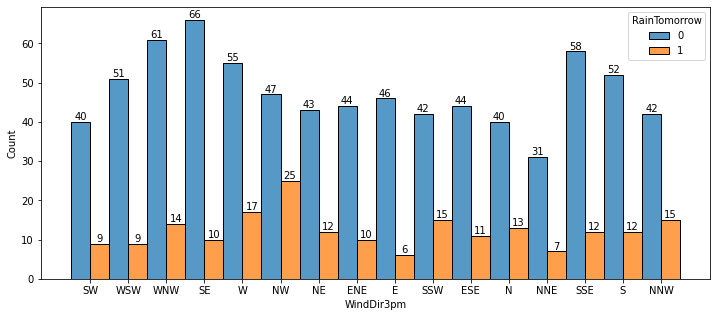

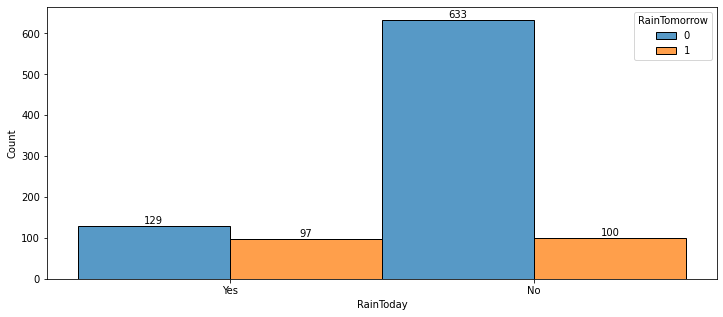

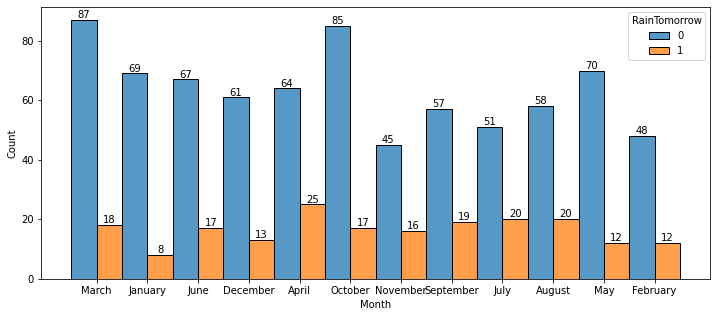

In [125]:
import seaborn as sns
for i in df_cat.columns:
    plt.figure(figsize= (12,5))
    y=sns.histplot(x=df_cat[i], hue=df['RainTomorrow'],multiple='dodge',stat='count')
    yes = []
    no  = []
    for i,j in zip(y.containers[0], y.containers[1]):
        yes.append(i.get_height())
        no.append(j.get_height())
    y.bar_label(y.containers[0], labels=yes)
    y.bar_label(y.containers[1], labels=no)
    plt.show()

#### Distribution of dependent variable.

In [126]:
# pip install --user --upgrade matplotlib

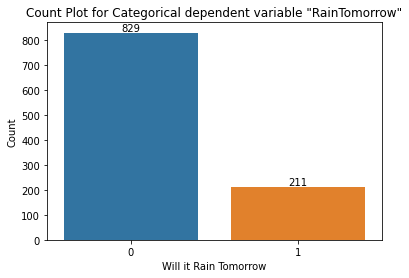

In [127]:
ax = sns.countplot(x='RainTomorrow', data=df)
ax.bar_label(ax.containers[0])

plt.title('Count Plot for Categorical dependent variable "RainTomorrow"')
plt.xlabel('Will it Rain Tomorrow')
plt.ylabel('Count')
plt.show()

<a id="null"></a>
## 2.5 Missing Value Treatment

#### First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [128]:
count=df.isnull().sum()
percent=(count/len(df))*100

df_missingvalues= pd.DataFrame({'Count': count, 'Percentage':percent})
df_missingvalues.sort_values(by='Percentage',ascending=False)   

,Count,Percentage
Sunshine,507,48.750000
Evaporation,458,44.038462
Cloud3pm,443,42.596154
Cloud9am,427,41.057692
Pressure9am,111,10.673077
Pressure3pm,108,10.384615
WindGustSpeed,71,6.826923
WindDir9am,59,5.673077
WindDir3pm,26,2.500000
Humidity3pm,24,2.307692


###  INFERENCE:   <font color='green'> For numerical features, lets impute using KNN imputation and for categorical features, lets impute missing values using mode.</font>

In [129]:
# Function definition to impute missing values

def KNN_imp(col):
    X = df[[col]]                         # Dataframe containing column with missing values.
    imputer = KNNImputer(n_neighbors=3)   # KNN imputer object with k=3.
    X_imputed = imputer.fit_transform(X)  # Imputing missing values.
    df[col] = X_imputed                   # Replacing missing values with the imputed values.
            
def mode_imp(col):
    for i in range(len(df)):
            mode_val=df[col].mode()
            df[col].fillna(value=mode_val[0], inplace=True)     
            

In [130]:
# Numerical features

num_col = df.select_dtypes(include=np.number).columns.tolist()
num_col.pop() # to remove target variable "Rain Tomorrow"
print(num_col)
print("Number of numeric var:" ,len(num_col))

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Number of numeric var: 14


In [131]:
# Categorical features

catg_col = df.select_dtypes(include='object').columns.tolist()
print(catg_col)
print("Number of numeric var:" ,len(catg_col))

['WindDir9am', 'WindDir3pm', 'RainToday', 'Month']
Number of numeric var: 4


In [132]:
# Function call to impute missing values

for i in num_col:
    KNN_imp(i)
    
for i in catg_col:
    mode_imp(i)    

In [133]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
dtype: int64

###  INFERENCE:   <font color='green'> Now the dataset does not contain any missing values.</font>

<a id="dummy"></a>
## 2.6 Dummy Encode the Categorical Variables

#### Split the dependent and independent variables.

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        1040 non-null   float64
 1   MaxTemp        1040 non-null   float64
 2   Rainfall       1040 non-null   float64
 3   Evaporation    1040 non-null   float64
 4   Sunshine       1040 non-null   float64
 5   WindGustSpeed  1040 non-null   float64
 6   WindDir9am     1040 non-null   object 
 7   WindDir3pm     1040 non-null   object 
 8   Humidity9am    1040 non-null   float64
 9   Humidity3pm    1040 non-null   float64
 10  Pressure9am    1040 non-null   float64
 11  Pressure3pm    1040 non-null   float64
 12  Cloud9am       1040 non-null   float64
 13  Cloud3pm       1040 non-null   float64
 14  Temp9am        1040 non-null   float64
 15  Temp3pm        1040 non-null   float64
 16  RainToday      1040 non-null   object 
 17  RainTomorrow   1040 non-null   int64  
 18  Month   

In [135]:
# Dependent variable/target - 'RainTomorrow'

df_dep = df['RainTomorrow']
df_dep.head(3)

0    1
1    0
2    0
Name: RainTomorrow, dtype: int64

In [136]:
# independent variables/predictor - all features except 'RainTomorrow'

df_indep = df.drop('RainTomorrow', axis = 1)
df_indep.head(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month
0,16.0,20.4,8.2,5.183505,7.606379,63.0,SSW,SW,69.0,92.0,1018.500000,1017.600000,1.00000,8.000000,17.4,15.6,Yes,March
1,18.5,25.9,16.0,5.400000,11.800000,39.0,SSW,WSW,60.0,36.0,1004.600000,1003.600000,7.00000,1.000000,22.2,25.1,Yes,January
2,8.7,16.5,0.0,5.183505,7.606379,56.0,WNW,WNW,41.0,41.0,1017.277718,1014.931438,4.59217,4.447236,13.1,15.1,No,June


#### Filter numerical and categorical variables.

In [137]:
df_num = df_indep.select_dtypes(include = [np.number])
print(df_num.columns)
print(len(df_num.columns))
df_num.head(5)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')
14


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,16.0,20.4,8.2,5.183505,7.606379,63.0,69.0,92.0,1018.500000,1017.600000,1.00000,8.000000,17.4,15.6
1,18.5,25.9,16.0,5.400000,11.800000,39.0,60.0,36.0,1004.600000,1003.600000,7.00000,1.000000,22.2,25.1
2,8.7,16.5,0.0,5.183505,7.606379,56.0,41.0,41.0,1017.277718,1014.931438,4.59217,4.447236,13.1,15.1
3,25.5,33.9,0.2,5.000000,7.000000,41.0,64.0,59.0,1009.800000,1007.400000,6.00000,5.000000,30.8,31.5
4,3.8,23.0,0.0,5.183505,7.606379,28.0,56.0,29.0,1017.277718,1014.931438,4.59217,4.447236,14.0,21.1


In [138]:
df_cat = df_indep.select_dtypes(include = [np.object])
print(df_cat.columns)
print(len(df_cat.columns))

Index(['WindDir9am', 'WindDir3pm', 'RainToday', 'Month'], dtype='object')
4


**The logistic regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding.**  

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [139]:
# To perform n-1 dummy encoding for each categorical variable - set drop_first to 'True'
# This will drop the first category of each categorical variable

df_dummy = pd.get_dummies(data=df_cat,drop_first = True)
df_dummy.head(5)

,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [140]:
df_dummy.shape

(1040, 42)

###  INFERENCE:   <font color='green'> To perform n-1 dummy encoding for each categorical variable - set drop_first to 'True'. This will drop the first category of each categorical variable. After dummy encoding, number of categorical features has increased from  4 to 42 columns.</font>

<a id="scale"></a>
## 2.7 Scale the Data 

**We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.**

In [141]:
# Min-max scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_scaled = scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)
df_num_scaled.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.614679,0.474273,0.067545,0.189822,0.551187,0.519231,0.670213,0.917526,0.597403,0.609914,0.125000,1.000000,0.482100,0.408389
1,0.691131,0.597315,0.131796,0.198413,0.855072,0.288462,0.574468,0.340206,0.339518,0.308190,0.875000,0.125000,0.596659,0.618102
2,0.391437,0.387025,0.000000,0.189822,0.551187,0.451923,0.372340,0.391753,0.574726,0.552402,0.574021,0.555905,0.379475,0.397351
3,0.905199,0.776286,0.001647,0.182540,0.507246,0.307692,0.617021,0.577320,0.435993,0.390086,0.750000,0.625000,0.801909,0.759382
4,0.241590,0.532438,0.000000,0.189822,0.551187,0.182692,0.531915,0.268041,0.574726,0.552402,0.574021,0.555905,0.400955,0.529801


###  INFERENCE:   <font color='green'> Scaling is performed only on numerical variables. We have used Min-Max scaler inorder to retain actual values of data and do not want to standardize them (i.e making mean =0 and SD=1). Since the data contains outliers , its better to use Min-Max scaler as they are robust to outliers.    </font>

#### Concatenate scaled numerical and dummy encoded categorical variables.

In [142]:
X = pd.concat([df_num_scaled,df_dummy], axis = 1)
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,0.614679,0.474273,0.067545,0.189822,0.551187,0.519231,0.670213,0.917526,0.597403,0.609914,0.125000,1.000000,0.482100,0.408389,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0.691131,0.597315,0.131796,0.198413,0.855072,0.288462,0.574468,0.340206,0.339518,0.308190,0.875000,0.125000,0.596659,0.618102,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
2,0.391437,0.387025,0.000000,0.189822,0.551187,0.451923,0.372340,0.391753,0.574726,0.552402,0.574021,0.555905,0.379475,0.397351,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.905199,0.776286,0.001647,0.182540,0.507246,0.307692,0.617021,0.577320,0.435993,0.390086,0.750000,0.625000,0.801909,0.759382,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.241590,0.532438,0.000000,0.189822,0.551187,0.182692,0.531915,0.268041,0.574726,0.552402,0.574021,0.555905,0.400955,0.529801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###  INFERENCE:   <font color='green'> After scaling numerical variables using a separate dataframe and performing dummy enoding for categorical variables in a different dataframe, lets merge them into a single input dataframe -'X'.    </font>

In [143]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 56 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MinTemp          1040 non-null   float64
 1   MaxTemp          1040 non-null   float64
 2   Rainfall         1040 non-null   float64
 3   Evaporation      1040 non-null   float64
 4   Sunshine         1040 non-null   float64
 5   WindGustSpeed    1040 non-null   float64
 6   Humidity9am      1040 non-null   float64
 7   Humidity3pm      1040 non-null   float64
 8   Pressure9am      1040 non-null   float64
 9   Pressure3pm      1040 non-null   float64
 10  Cloud9am         1040 non-null   float64
 11  Cloud3pm         1040 non-null   float64
 12  Temp9am          1040 non-null   float64
 13  Temp3pm          1040 non-null   float64
 14  WindDir9am_ENE   1040 non-null   uint8  
 15  WindDir9am_ESE   1040 non-null   uint8  
 16  WindDir9am_N     1040 non-null   uint8  
 17  WindDir9am_NE 

<a id="split"></a>
## 2.8 Train-Test Split

In [144]:
# import functions
import statsmodels
import statsmodels.api as sm

# Since intercept is not considered by default while using the 'Logit' method 
# we can add it to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# Here X = set of independent variables and df_dep = dependent variable('RainTomorrow')
X_train, X_test, Y_train, Y_test = train_test_split(X, df_dep, random_state=10, test_size = 0.3)

# Print dimension of train set
print('Shape of X_train', X_train.shape)
print('Shape of Y_train', Y_train.shape)

# Print dimension of test set
print('Shape of X_test', X_test.shape)
print('Shape of Y_test', Y_test.shape)

Shape of X_train (728, 57)
Shape of Y_train (728,)
Shape of X_test (312, 57)
Shape of Y_test (312,)


<a id="logit"></a>
# 3. Logistic Regression (Full Model)

#### Build a full logistic model on a training dataset.

In [145]:
# Build the model on train data (X_train and Y_train)
logreg = sm.Logit(Y_train,X_train).fit()

# Print the summary of the model
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.302582
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                  728
Model:                          Logit   Df Residuals:                      671
Method:                           MLE   Df Model:                           56
Date:                Sun, 07 May 2023   Pseudo R-squ.:                  0.3868
Time:                        18:04:22   Log-Likelihood:                -220.28
converged:                       True   LL-Null:                       -359.25
Covariance Type:            nonrobust   LLR p-value:                 3.648e-31
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6243      2.163     -3.988      0.000     -12.863      -4.385
MinTemp             0.8720      2.164      0.403      0.687      -3.369       5.113
MaxTemp            -1.6772      3.822     -0.439      0.661      -9.168       5.813
Rainfall           -0.5686      2.678     -0.212      0.832      -5.817       4.680
Evaporation        -0.0801      1.514     -0.053      0.958      -3.048       2.888
Sunshine           -1.6042      0.880     -1.822      0.068      -3.330       0.121
WindGustSpeed       7.2931      1.296      5.626      0.000       4.752       9.834
Humidity9am         1.3066      1.306      1.000      0.317      -1.253       3.866
Humidity3pm         7.9986      1.492      5.362      0.000       5.075      10.922
Pressure9am        10.0760      4.624      2.179      0.029       1.013      19.139
Pressure3pm       -12.1129      4.100     -2.954      0.003     -20.149      -4.076
Cloud9am           -1.0343      0.702     -1.474      0.141      -2.410       0.341
Cloud3pm            1.6260      0.766      2.122      0.034       0.124       3.128
Temp9am            -4.7543      4.033     -1.179      0.238     -12.659       3.151
Temp3pm             7.1883      4.312      1.667      0.096      -1.263      15.640
WindDir9am_ENE      0.4493      0.916      0.490      0.624      -1.347       2.245
WindDir9am_ESE     -0.7482      1.137     -0.658      0.510      -2.976       1.480
WindDir9am_N        0.7528      0.759      0.992      0.321      -0.734       2.240
WindDir9am_NE       0.1141      0.847      0.135      0.893      -1.546       1.774
WindDir9am_NNE      0.5992      0.964      0.622      0.534      -1.290       2.488
WindDir9am_NNW      0.7552      0.906      0.833      0.405      -1.021       2.531
WindDir9am_NW       0.6545      0.827      0.792      0.428      -0.966       2.275
WindDir9am_S        0.8638      0.884      0.977      0.329      -0.870       2.597
WindDir9am_SE       0.8087      0.832      0.973      0.331      -0.821       2.438
WindDir9am_SSE      0.5013      0.842      0.596      0.551      -1.148       2.151
WindDir9am_SSW      0.4626      0.916      0.505      0.614      -1.333       2.258
WindDir9am_SW       0.4153      0.967      0.430      0.667      -1.479       2.310
WindDir9am_W        0.2976      0.813      0.366      0.714      -1.296       1.891
WindDir9am_WNW      0.9609      0.864      1.112      0.266      -0.732       2.654
WindDir9am_WSW     -0.4840      1.066     -0.454      0.650      -2.573       1.605
WindDir3pm_ENE      0.0573      0.825      0.070      0.945      -1.559       1.674
WindDir3pm_ESE      0.3813      0.792      0.481      0.630      -1.172       1.935
WindDir3pm_N       -0.4753      0.817     -0.582      0.561      -2.076       1.126
WindDir3pm_NE       0.1780      0.749      0.238      0.812      -1.290       1.646
WindDir3pm_NNE     -0.7980      0.933     -0.855      0.392      -2.626       1.030
WindDir3pm_NNW     -0.2641      0.785     -0.336 

###  INFERENCE:   

### <font color='blue'> Pseudo R-squ: 0.3868 </font> - <font color='green'> Pseudo R-squared value usually ranges from 0 to 1. Higher values indicate better fit.</font>

###  <font color='blue'>Log-Likelihood:	-226.89 </font>  - <font color='green'> It measures the log-likelihood of the data. Higher value indicates better fit.</font>

###  <font color='blue'>LL-Null: -359.25 </font> - <font color='green'> It is the log-likelihood of the data for a null model, which only includes the intercept.</font>

###  <font color='blue'>LLR p-value: 3.648e-31</font> - <font color='green'> LLR p-value (likelihood ratio test) is a statistical test that indicates the probability of observing the LLR statistic or a larger value under the null hypothesis. Lower p-values indicate stronger evidence against the null hypothesis. The LLR p-value less than 0.05, implies that the model is significant</font>

### <font color='green'>A logistic regression model is set to have better fit when values are higher for LL, lower for LL-Null, and lower for LLR p-value.</font>

**Calculate the AIC (Akaike Information Criterion) value.**

**It is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.**

In [146]:
print('AIC:', logreg.aic)

AIC: 554.5596483458571


### INFERENCE:  <font color='green'> AIC is a measure of the trade-off between the goodness of fit of the model and the complexity of the model.It helps us choose a model that fits the data well without overfitting. This is useful when comparing multiple models fitted to the same data. Model with the lowest AIC value is usually considered to be the best model.</font>

**We can use the AIC value to compare different models created on the same dataset.**

### Interpret the odds for each variable 

In [147]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 
df_odds

,Odds
const,0.000180
MinTemp,2.391608
MaxTemp,0.186897
Rainfall,0.566307
Evaporation,0.923009
Sunshine,0.201043
WindGustSpeed,1470.161649
Humidity9am,3.693517
Humidity3pm,2976.756988
Pressure9am,23765.376172


**Interpretation: Write the interpretation of how does a unit change in each feature influence the odds of getting rain tomorrow.**

###  INFERENCE:   

### <font color='blue'> Odds value of 'Humidity3pm' = 2976.7569.</font> <font color='green'> The odds that it will rain tomorrow increases by a factor of 3354.260 for every unit increase in 'Humidity3pm' while other variables are constant.</font> 
###  <font color='blue'> Odds value of 'Pressure9am' = 23765.209149. </font> <font color='green'> The odds that it will rain tomorrow increases by a factor of 2352.209 for every unit increase in 'Pressure9am' while other variables are constant.</font> 
###  <font color='blue'>Odds value of 'WindGustSpeed' = 1470.1616. </font> <font color='green'> The odds that it will rain tomorrow increases by a factor of 2023.649 for every unit increase in 'WindGustSpeed' while other variables are constant.</font>
###  <font color='blue'>Odds value of 'Temp3pm' = 1323.8788</font> <font color='green'> The odds that it will rain tomorrow increases by a factor of 220.567 for every unit increase in 'Temp3pm' while other variables are constant.</font> 



### <font color='green'> Odds constant/intercept =	0.0001797. The odds that it will Rain tomorrow by considering all other variables as zero value is 0.000118.</font>

**Do predictions on the test set.**

In [148]:
# let 'y_pred_probability' be the predicted values of y
Y_pred_probability = logreg.predict(X_test)

# print the y_pred_probability
Y_pred_probability.head()

195    0.027412
761    0.021263
109    0.201190
999    0.039386
853    0.022746
dtype: float64

###  INFERENCE:   <font color='green'> The target variable can take only two values either 0 or 1. The cut-off value to predict between 0 & 1 is 0.5. i.e. if 'y_pred_probability' is less than 0.5, consider it as 'value 0' else consider it as 'value 1'.</font>

In [149]:
Y_pred = [ 0 if x < 0.5 else 1 for x in Y_pred_probability]
Y_pred[0:5]

[0, 0, 0, 0, 0]

###  INFERENCE:   <font color='green'> Since the head of Y_pred_probability has values less than zero (i.e., 0.02,0.02,0.20..), Y_pred has considered value 0 for the above 5 records in Y_pred_probability.</font>

#### Plot the confusion matrix.

###  DEFINITION:   <font color='blue'> A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model.
    
### <font color='blue'> Four types of outcomes are possible while evaluating a classification model performance.

### <font color='blue'>True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

### <font color='blue'>True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

### <font color='blue'>False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

### <font color='blue'>False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error. </font>

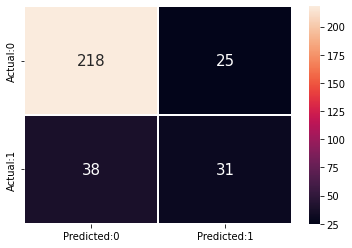

In [150]:
from sklearn.metrics import confusion_matrix

# Confusion matrix is plotted btw the actual and predicted target values
cm = confusion_matrix(Y_test, Y_pred)

confusion_matrix = pd.DataFrame(data = cm, columns =['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(confusion_matrix, annot = True, fmt = 'd',linewidths = 0.1, annot_kws = {'size':15})

plt.show()

In [151]:
# True Positives, TP = Actual '1' values predicted correctly as '1'.
TP = cm[1,1]
print('TP=',TP)

# True Negatives, TN = Actual '0' values predicted correctly as '0'.
TN = cm[0,0]
print('TN=',TN)

# False Positives FP = Actual '0' values that are falsely predicted  as '1' (Type 1 error)
FP = cm[0,1]
print('FP=',FP)

# False Negatives FN = Actual '1' values that are falsely predicted  as '0' (Type 2 error)
FN = cm[1,0]
print('FN=',FN)

TP= 31
TN= 218
FP= 25
FN= 38


###  INFERENCE:

### <font color='blue'>True Positives (TP=31) – Actual '1' values predicted correctly as '1'.

### <font color='blue'>True Negatives (TN=218) – Actual '0' values predicted correctly as '0'.

### <font color='blue'>False Positives (FP=25) – Actual '0' values that are falsely predicted as '1' (Type 1 error).

### <font color='blue'>False Negatives (FN=38) – Actual '1' values that are falsely predicted  as '0' (Type 2 error). </font>

**Compute various performance metrics.**

**Precision:** It is defined as the ratio of true positives to the total positive predictions.

In [152]:
Precision = TP / (TP+FP)
Precision

0.5535714285714286

In [153]:
Precision_score = metrics.precision_score(Y_test, Y_pred)
Precision_score

0.5535714285714286

**Recall:** It is the ratio of true positives to the total actual positive observations. It is also known as, `Sensitivity` or `True Positive Rate`.

In [154]:
Recall = TP / (TP+FN)
Recall

0.4492753623188406

In [155]:
Recall_score = metrics.recall_score(Y_test, Y_pred)
Recall_score

0.4492753623188406

**Specificity:** It is the ratio of true negatives to the total actual negative observations.

In [156]:
Specificity = TN / (TN+FP)
Specificity

0.897119341563786

**f1-score:** It is defined as the harmonic mean of precision and recall.

In [157]:
F1_score = (2*Precision*Recall)/(Precision+Recall)
F1_score

0.496

In [158]:
F1score = metrics.f1_score(Y_test, Y_pred) 
F1score

0.496

**Accuracy:** It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the dataset is imbalanced.

In [159]:
Accuracy = (TN+TP)/(TN+FP+FN+TP)
Accuracy

0.7980769230769231

In [160]:
Accuracy_score = metrics.accuracy_score(Y_test, Y_pred)
Accuracy_score

0.7980769230769231

###  INFERENCE: 
### <font color='blue'> Precision = 0.55 
###  <font color='blue'>Recall = 0.449
### <font color='blue'> Specificity= 0.897
### <font color='blue'> F1_score = 0.496
### <font color='blue'> Accuracy = 0.7980

### INFERENCE: <font color='green'> For a good classification model all the above performance metrics should be of higher values. This shows that model is not fit properly and it can be caused due to data imbalance issue.

In [161]:
from sklearn.metrics import classification_report
acc_table = classification_report(Y_test, Y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       243
           1       0.55      0.45      0.50        69

    accuracy                           0.80       312
   macro avg       0.70      0.67      0.68       312
weighted avg       0.79      0.80      0.79       312



###  INFERENCE: <font color='blue'>From the above output, we can see that recall of the positive class ('Sensitivity') is 0.45  and the recall of the negative class ('Specificity') is 0.90 . 
    
###  <font color='blue'>We can see that the model with cut-off = 0.5 is not that much accurate due to imbalanced data.

### INFERENCE: <font color='green'> 'Support' is the number of observations in the corresponding class. The 'Macro average' in the output is obtained by averaging the unweighted mean per label and the 'Weighted average' is given by averaging the support-weighted mean per label.

**Kappa score:** It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

In [162]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(Y_test, Y_pred)
print('kappa value:',kappa)

kappa value: 0.37145049884881043


**Interpretation:** Write the inference based on the kappa score value and this model falls under which agreeemnet.

###  INFERENCE: <font color='green'> Kappa score, also known as Cohen's kappa coefficient, is used for inter-rater agreement for categorical items. It is often used to evaluate the degree of agreement between two or more raters  when classifying items into categories.Kappa score ranges from -1 to 1.
### <font color='green'>Kappa < 0: Agreement is worse than chance.
### <font color='green'>Kappa between 0 and 0.20: Slight agreement.
### <font color='green'>Kappa between 0.21 and 0.40: Fair agreement.
### <font color='green'>Kappa between 0.41 and 0.60: Moderate agreement.
### <font color='green'>Kappa between 0.61 and 0.80: Substantial agreement.
### <font color='green'>Kappa between 0.81 and 1.00: Almost perfect agreement.
               
               
###  INFERENCE: <font color='blue'> Kappa score for the full model (with cut-off probability 0.5) is 0.3714. We can say that there is Fair agreement between the actual and predicted values.

#### Plot the ROC curve.

ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of separability of the model.

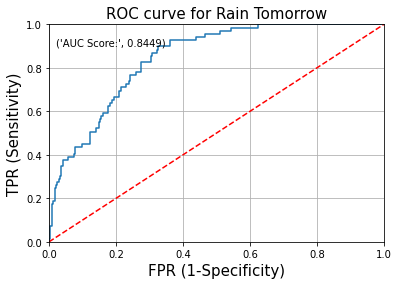

In [163]:
from sklearn.metrics import roc_curve

FPR, TPR, thresholds = roc_curve(Y_test, Y_pred_probability)

plt.plot(FPR, TPR)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Rain Tomorrow', fontsize = 15)
plt.xlabel('FPR (1-Specificity)', fontsize = 15)
plt.ylabel('TPR (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, Y_pred_probability),4)))
                               
# plot the grid
plt.grid(True)

**Interpretation:** Provide inference based on the obtained ROC curve and AUC score.

###  INFERENCE: <font color='green'> AUC (Area Under the ROC Curve) is a metric to evaluate the performance of a binary classification model. The ROC (Receiver Operating Characteristic) curve is a plot of the true positive rate (TPR) against the false positive rate (FPR). AUC is the area under the ROC curve, which ranges between 0 and 1, where: An AUC score of 0.5 indicates a random classifier that performs no better than chance. An AUC score between 0.5 and 1 indicates a classifier that is better than chance. In general, a higher AUC score indicates better classification performance.

### <font color='green'>If the dataset is imbalanced, i.e., the number of samples in one class is larger than other, then a high AUC score may be obtained even for a classifier that performs poorly on the minority class. In such cases, it is important to look at other metrics such as precision, recall, and F1-score to get a better understanding of the classifier's performance.

### <font color='blue'>The AUC score for full model is 0.8449 and its a good performance score. Since the data is imbalanced, there could be a possibility that it correctly classifies positive cases, even if many negative cases are misclassified. Its better to look into other performance metrics value to evaluate the performance of the model.

### <font color='red'>Since all performance metrics state that model performance is poor, lets us balance the data through SMOTE and again build logistc regression model.
    
## BALANCING DATA USING SMOTE -Synthetic Minority Over-sampling Technique.

In [164]:
# Number of values in 'RainTomorrow' for each class before SMOTE

df_dep.value_counts()

0    829
1    211
Name: RainTomorrow, dtype: int64

In [165]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

X_sm, Y_sm = smote.fit_resample(X, df_dep)

# Number of values in 'RainTomorrow' for each class after SMOTE
Y_sm.value_counts()

1    829
0    829
Name: RainTomorrow, dtype: int64

In [166]:
X_smtrain, X_smtest, Y_smtrain, Y_smtest = train_test_split(X_sm, Y_sm, test_size=0.3, random_state=10)
print('Shape of X_train', X_smtrain.shape)
print('Shape of Y_train', Y_smtrain.shape)

# Print dimension of test set
print('Shape of X_smtest', X_smtest.shape)
print('Shape of Y_smtest', Y_smtest.shape)

Shape of X_train (1160, 57)
Shape of Y_train (1160,)
Shape of X_smtest (498, 57)
Shape of Y_smtest (498,)


In [167]:
# Build the model on train data (X_train and Y_train)
sm_logreg = sm.Logit(Y_smtrain,X_smtrain).fit()

# Print the summary of the model
sm_logreg.summary()

Optimization terminated successfully.
         Current function value: 0.252950
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                 1160
Model:                          Logit   Df Residuals:                     1103
Method:                           MLE   Df Model:                           56
Date:                Sun, 07 May 2023   Pseudo R-squ.:                  0.6350
Time:                        18:04:25   Log-Likelihood:                -293.42
converged:                       True   LL-Null:                       -803.91
Covariance Type:            nonrobust   LLR p-value:                2.509e-177
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.1899      1.741      0.684      0.494      -2.222       4.602
MinTemp             1.3515      2.035      0.664      0.507      -2.637       5.340
MaxTemp            -5.7162      3.659     -1.562      0.118     -12.887       1.455
Rainfall           -0.1233      2.036     -0.061      0.952      -4.114       3.867
Evaporation        -0.0277      1.573     -0.018      0.986      -3.111       3.056
Sunshine           -2.1948      0.873     -2.515      0.012      -3.905      -0.484
WindGustSpeed       8.3624      1.176      7.110      0.000       6.057      10.668
Humidity9am        -0.4399      1.173     -0.375      0.708      -2.739       1.859
Humidity3pm        10.6167      1.483      7.157      0.000       7.709      13.524
Pressure9am         3.9247      4.590      0.855      0.392      -5.071      12.920
Pressure3pm        -9.5463      3.922     -2.434      0.015     -17.234      -1.859
Cloud9am           -0.7000      0.664     -1.054      0.292      -2.002       0.602
Cloud3pm            1.3467      0.688      1.957      0.050      -0.002       2.695
Temp9am            -7.7761      3.922     -1.983      0.047     -15.463      -0.089
Temp3pm            11.1989      4.375      2.560      0.010       2.624      19.774
WindDir9am_ENE     -2.3040      0.641     -3.595      0.000      -3.560      -1.048
WindDir9am_ESE     -3.0271      0.737     -4.107      0.000      -4.472      -1.582
WindDir9am_N       -2.2674      0.435     -5.217      0.000      -3.119      -1.416
WindDir9am_NE      -2.1235      0.559     -3.796      0.000      -3.220      -1.027
WindDir9am_NNE     -2.0006      0.749     -2.672      0.008      -3.468      -0.533
WindDir9am_NNW     -2.6493      0.619     -4.283      0.000      -3.862      -1.437
WindDir9am_NW      -2.2275      0.512     -4.353      0.000      -3.230      -1.224
WindDir9am_S       -1.1207      0.619     -1.810      0.070      -2.334       0.093
WindDir9am_SE      -1.7454      0.540     -3.232      0.001      -2.804      -0.687
WindDir9am_SSE     -1.9333      0.545     -3.549      0.000      -3.001      -0.866
WindDir9am_SSW     -2.1809      0.667     -3.269      0.001      -3.488      -0.873
WindDir9am_SW      -2.4746      0.636     -3.893      0.000      -3.720      -1.229
WindDir9am_W       -2.8145      0.547     -5.144      0.000      -3.887      -1.742
WindDir9am_WNW     -1.9613      0.614     -3.194      0.001      -3.165      -0.758
WindDir9am_WSW     -4.1315      0.824     -5.013      0.000      -5.747      -2.516
WindDir3pm_ENE     -2.4089      0.577     -4.175      0.000      -3.540      -1.278
WindDir3pm_ESE     -3.1676      0.537     -5.898      0.000      -4.220      -2.115
WindDir3pm_N       -2.5969      0.564     -4.602      0.000      -3.703      -1.491
WindDir3pm_NE      -2.7334      0.540     -5.066      0.000      -3.791      -1.676
WindDir3pm_NNE     -3.9679      0.704     -5.634      0.000      -5.348      -2.588
WindDir3pm_NNW     -2.7847      0.531     -5.243 

###  INFERENCE:   

### <font color='blue'> Pseudo R-squ: 0.6277 </font> - <font color='green'> Pseudo R-squared value usually ranges from 0 to 1. Higher values indicate better fit. Value has improved from 0.3868 to 0.6277 for balanced data. </font>

###  <font color='blue'>Log-Likelihood:	-299.99 </font>  - <font color='green'> It measures the log-likelihood of the data. Higher value indicates better fit. Value has improved from -226.89 to -299.99 for balanced data.  </font>

###  <font color='blue'>LL-Null: -803.91  </font> - <font color='green'> It is the log-likelihood of the data for a null model, which only includes the intercept.Value has further reduced from -359.25 to -803.91  for balanced data. </font>

###  <font color='blue'>LLR p-value: 6.641e-175 </font> - <font color='green'> LLR p-value (likelihood ratio test) is a statistical test that indicates the probability of observing the LLR statistic or a larger value under the null hypothesis. Lower p-values indicate stronger evidence against the null hypothesis. The LLR p-value less than 0.05, implies that the model is significant. 

### <font color='green'>A logistic regression model is set to have better fit when values are higher for LL, lower for LL-Null, and lower for LLR p-value.</font>

In [168]:
print('AIC:', sm_logreg.aic)

AIC: 700.8431732353822


In [169]:
sm_df_odds = pd.DataFrame(np.exp(sm_logreg.params), columns= ['Odds']) 
sm_df_odds

,Odds
const,3.286865
MinTemp,3.863197
MaxTemp,0.003292
Rainfall,0.883990
Evaporation,0.972654
Sunshine,0.111382
WindGustSpeed,4282.861179
Humidity9am,0.644102
Humidity3pm,40809.134559
Pressure9am,50.638373


In [170]:
Y_smpred_prob = sm_logreg.predict(X_smtest)

# print the y_pred_probability
Y_smpred_prob.head()

486     0.341469
1442    0.699630
1181    0.983067
123     0.937996
36      0.011933
dtype: float64

In [171]:
Y_smpred = [ 0 if x < 0.5 else 1 for x in Y_smpred_prob]
Y_smpred[0:5]

[0, 1, 1, 1, 0]

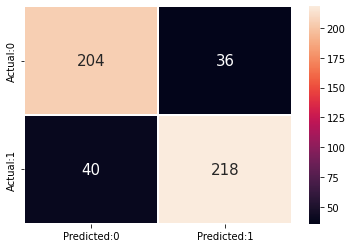

In [172]:
from sklearn.metrics import confusion_matrix

# Confusion matrix is plotted btw the actual and predicted target values
cm_sm = confusion_matrix(Y_smtest, Y_smpred)

confusion_matrix = pd.DataFrame(data = cm_sm, columns =['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(confusion_matrix, annot = True, fmt = 'd',linewidths = 0.1, annot_kws = {'size':15})

plt.show()

In [173]:
# True Positives, TP = Actual '1' values predicted correctly as '1'.
TP = cm_sm[1,1]
print('TP=',TP)

# True Negatives, TN = Actual '0' values predicted correctly as '0'.
TN = cm_sm[0,0]
print('TN=',TN)

# False Positives FP = Actual '0' values that are falsely predicted  as '1' (Type 1 error)
FP = cm_sm[0,1]
print('FP=',FP)

# False Negatives FN = Actual '1' values that are falsely predicted  as '0' (Type 2 error)
FN = cm_sm[1,0]
print('FN=',FN)

TP= 218
TN= 204
FP= 36
FN= 40


###  INFERENCE:

### <font color='blue'>True Positives (TP=216) – Actual '1' values predicted correctly as '1'.

### <font color='blue'>True Negatives (TN=204) – Actual '0' values predicted correctly as '0'.

### <font color='blue'>False Positives (FP=36) – Actual '0' values that are falsely predicted as '1' (Type 1 error).

### <font color='blue'>False Negatives (FN=42) – Actual '1' values that are falsely predicted  as '0' (Type 2 error). </font>

In [174]:
print('Precision_score = ', metrics.precision_score(Y_smtest, Y_smpred))
print('Recall_score = ', metrics.recall_score(Y_smtest, Y_smpred))
print('F1score = ',  metrics.f1_score(Y_smtest, Y_smpred) )
print('Accuracy_score = ', metrics.accuracy_score(Y_smtest, Y_smpred))

Precision_score =  0.8582677165354331
Recall_score =  0.8449612403100775
F1score =  0.8515625
Accuracy_score =  0.8473895582329317


In [175]:
Specificity = TN / (TN+FP)
print('Specificity= ',Specificity)

Specificity=  0.85


###  INFERENCE: 
### <font color='blue'> Precision = 0.857 
###  <font color='blue'>Recall = 0.837
### <font color='blue'> Specificity= 0.85
### <font color='blue'> F1_score = 0.847
### <font color='blue'> Accuracy = 0.8433

### INFERENCE: <font color='green'> From the above values we can conclude that the performance evaluation metrics are good and the classification model is fit properly.

In [176]:
from sklearn.metrics import classification_report
acc_table_sm = classification_report(Y_smtest, Y_smpred)
print(acc_table_sm)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       240
           1       0.86      0.84      0.85       258

    accuracy                           0.85       498
   macro avg       0.85      0.85      0.85       498
weighted avg       0.85      0.85      0.85       498



###  INFERENCE: <font color='blue'>For a balanced model, we can infer from the above output  that the recall of the positive class ('Sensitivity') is 0.84  and the recall of the negative class ('Specificity') is 0.85. The precision value for positive class is 0.86 and negative class is 0.84 which is relatively close to each other.
    
###  <font color='blue'>We can see that the model with cut-off = 0.5 is 84% accurate.

### INFERENCE: <font color='green'> 'Support' is the number of observations in the corresponding class. The 'Macro average' in the output is obtained by averaging the unweighted mean per label and the 'Weighted average' is given by averaging the support-weighted mean per label.

In [177]:
from sklearn.metrics import cohen_kappa_score
sm_kappa = cohen_kappa_score(Y_smtest, Y_smpred)
print('kappa value:',sm_kappa)

kappa value: 0.694557427852024


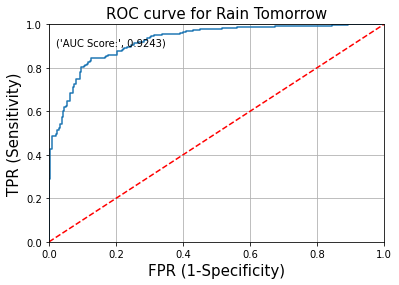

In [178]:
from sklearn.metrics import roc_curve

FPR_s, TPR_s, thresholds_s = roc_curve(Y_smtest, Y_smpred_prob)

plt.plot(FPR_s, TPR_s)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Rain Tomorrow', fontsize = 15)
plt.xlabel('FPR (1-Specificity)', fontsize = 15)
plt.ylabel('TPR (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_smtest, Y_smpred_prob),4)))
                               
# plot the grid
plt.grid(True)

###  INFERENCE: <font color='green'> AUC (Area Under the ROC Curve) is a metric to evaluate the performance of a binary classification model. 

### <font color='blue'>The AUC score for a classification model created using balanced data is 0.9243 and its a very good performance score.

## Identify the Best Cut-off value using Youden's Index

<a id="youden"></a>
### 3.1.1 Youden's Index

In [179]:
sm_youdens_table = pd.DataFrame({'TPR_s': TPR_s,
                             'FPR_s': FPR_s,
                             'Threshold_s': thresholds_s})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
sm_youdens_table['Difference'] = sm_youdens_table.TPR_s - sm_youdens_table.FPR_s

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
sm_youdens_table = sm_youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
sm_youdens_table.head()

,TPR_s,FPR_s,Threshold_s,Difference
0,0.844961,0.125000,0.535761,0.719961
1,0.825581,0.116667,0.579426,0.708915
2,0.829457,0.120833,0.569925,0.708624
3,0.802326,0.095833,0.651314,0.706492
4,0.810078,0.104167,0.623133,0.705911


In [186]:
Y_smpred_youden = [ 0 if x < 0.53 else 1 for x in Y_smpred_prob]
Y_smpred_youden[0:5]

[0, 1, 1, 1, 0]

###  INFERENCE: <font color='green'> Youden's index, also known as Youden's J statistic or simply J statistic, is a measure of the overall performance of a binary classifier. It is defined as the difference between the true positive rate (sensitivity) and the false positive rate (1-specificity), and it ranges from 0 to 1. The formula for Youden's index is: J = sensitivity + specificity - 1

###  INFERENCE: <font color='green'> Sensitivity is the proportion of true positive results (TP) out of all actual positives (TP + FN). Specificity is the proportion of true negative results (TN) out of all actual negatives (TN + FP). The interpretation of Youden's index is that it represents the ability of a classifier to correctly identify both positive and negative samples. A value of 0 indicates that the classifier performs no better than chance, while a value of 1 indicates perfect classification.

### <font color='blue'>The threshold value for maximum difference(0.719961) is 0.535761 and is fairly a good score.

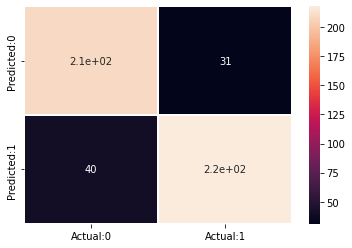

In [187]:
from sklearn.metrics import confusion_matrix

sm_cm_you = confusion_matrix(Y_smtest, Y_smpred_youden)

conf_matrix_you = pd.DataFrame(data = sm_cm_you,columns = ['Actual:0','Actual:1'], index = ['Predicted:0','Predicted:1'])

sns.heatmap(conf_matrix_you, annot = True, linewidths = 0.1, annot_kws = {'size':10})

plt.show()

In [188]:
# True Positives, TP = Actual '1' values predicted correctly as '1'.
TP = sm_cm_you[1,1]
print('TP=',TP)

# True Negatives, TN = Actual '0' values predicted correctly as '0'.
TN = sm_cm_you[0,0]
print('TN=',TN)

# False Positives FP = Actual '0' values that are falsely predicted  as '1' (Type 1 error)
FP = sm_cm_you[0,1]
print('FP=',FP)

# False Negatives FN = Actual '1' values that are falsely predicted  as '0' (Type 2 error)
FN = sm_cm_you[1,0]
print('FN=',FN)

TP= 218
TN= 209
FP= 31
FN= 40


###  INFERENCE:

### <font color='blue'>True Positives (TP=218) – Actual '1' values predicted correctly as '1'.

### <font color='blue'>True Negatives (TN=209) – Actual '0' values predicted correctly as '0'.

### <font color='blue'>False Positives (FP=31) – Actual '0' values that are falsely predicted as '1' (Type 1 error).This value has reduced compared to previous confusion matrix.

### <font color='blue'>False Negatives (FN=40) – Actual '1' values that are falsely predicted  as '0' (Type 2 error). </font>

In [189]:
sm_acc_table_youden = classification_report(Y_smtest, Y_smpred_youden)
print(sm_acc_table_youden)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       240
           1       0.88      0.84      0.86       258

    accuracy                           0.86       498
   macro avg       0.86      0.86      0.86       498
weighted avg       0.86      0.86      0.86       498



###  INFERENCE: <font color='blue'>For a balanced model with youden's cut off value, we can infer from the above output  that the values have improved. The recall of the positive class ( 'Sensitivity') is 0.84 and the recall of the negative class ('Specificity') is 0.87 . The precision value for positive class is 0.88 and negative class is 0.84 which is relatively close to each other.
    
###  <font color='blue'>We can see that the model with youden's cut-off  value 0.53 is 86% accurate.

### INFERENCE: <font color='green'> 'Support' is the number of observations in the corresponding class. The 'Macro average' in the output is obtained by averaging the unweighted mean per label and the 'Weighted average' is given by averaging the support-weighted mean per label.

In [190]:
kappa = cohen_kappa_score(Y_smtest, Y_smpred_youden)
print('kappa value:',kappa)

kappa value: 0.714859437751004


###  INFERENCE: <font color='green'> Kappa score, also known as Cohen's kappa coefficient, is used for inter-rater agreement for categorical items. Kappa score ranges from -1 to 1.               
               
###  INFERENCE: <font color='blue'> Kappa score for the balanced model (with cut-off probability 0.53) is 0.7148 which is almost 0.70. We can say that there is Substantial agreement between the actual and predicted values.

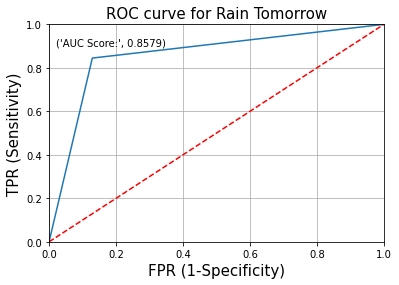

In [191]:
FPR_s, TPR_s, thresholds_s = roc_curve(Y_smtest, Y_smpred_youden)

plt.plot(FPR_s, TPR_s)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Rain Tomorrow', fontsize = 15)
plt.xlabel('FPR (1-Specificity)', fontsize = 15)
plt.ylabel('TPR (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_smtest, Y_smpred_youden),4)))
                               
# plot the grid
plt.grid(True)

###  INFERENCE: <font color='green'> AUC (Area Under the ROC Curve) is a metric to evaluate the performance of a binary classification model. 
### <font color='blue'>The AUC score for creating model using balanced data and after optimizing it with youden's index is 0.8579 and its a very good performance score. 